<a href="https://colab.research.google.com/github/ChicagoPark/chicago_work/blob/main/json_parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 라이브러리 Import

In [ ]:
import os
import json
# hihi
import numpy as np
import matplotlib.pyplot as plt

# 구글 드라이브 마운트

In [ ]:
# 현재 colab 상태에서는 구글 드라이브에 접근할 수 있는 권한이 없다. drive 에 접근할 수 있는 권한을 부여한다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/빅데이터및AI/

/content/drive/MyDrive/Colab Notebooks/빅데이터및AI


In [ ]:
ls

'0. stone'/                  Images/
'1. pothole'/                Images_.zip
'2. filled'/                 Images.zip
 Annotations/                json_parsing.ipynb
 Annotations.zip             MNIST.ipynb
 clustering_exercise.ipynb  '실차 데이터.zip'
 data.zip                   '실차 데이터.zip (Unzipped Files)'/


## 주석, 이미지 압축 파일 해제

In [ ]:
''' 이미 압축을 풀었으니 주석처리
# linux command 를 쓰기위해서 ! 를 앞에 붙여준다.
!unzip Annotations.zip -d Annotations
!zip -FFv Images.zip --out Images_.zip
!unzip Images_.zip -d Images
'''

' 이미 압축을 풀었으니 주석처리\n# linux command 를 쓰기위해서 ! 를 앞에 붙여준다.\n!unzip Annotations.zip -d Annotations\n!zip -FFv Images.zip --out Images_.zip\n!unzip Images_.zip -d Images\n'

In [ ]:
ls

'0. stone'/                  Images/
'1. pothole'/                Images_.zip
'2. filled'/                 Images.zip
 Annotations/                json_parsing.ipynb
 Annotations.zip             MNIST.ipynb
 clustering_exercise.ipynb  '실차 데이터.zip'
 data.zip                   '실차 데이터.zip (Unzipped Files)'/


## 주석, 이미지 파일 확인

In [ ]:
# "Annotations/" 에 있는 파일 불러오기
annots = os.listdir('Annotations')    # Annotations 에 있는 모든 파일명들이 list 로 저장이 된다.
# "Images/" 에 있는 파일 불러오기
images = os.listdir('Images/Images')  # Annotations 에 있는 모든 파일명들이 list 로 저장이 된다.

annots = sorted(annots)               # sorted 파일명을 받아온다.
images = sorted(images)

print(len(annots), len(images))

In [ ]:
# 주석 파일 오픈
# annoations 는 json 형태로 저장이 되어있다. json : 딕셔너리 형태로 key 와 value 가 정해져있는 것
with open(f'Annotations/{annots[0]}') as f:
  json_file = json.load(f)                  # json_file 에 딕셔너리 형태로 파일을 읽어온다.

In [ ]:
# 주석 파일은 Dictionary 타입으로, key와 value로 이루어짐
# key 값 확인
json_file.keys()

In [ ]:
# 'info' value 확인
json_file['info']

In [ ]:
# 'images' value 확인
json_file['images']

In [ ]:
# 'annotations' value 확인
json_file['annotations']

In [ ]:
# 'categories' value 확인
json_file['categories']

In [ ]:
# 이미지 파일 오픈
from PIL import Image
Image.open(f'Images/Images/{images[0]}')

### 이미지에 주석 적용하여 객체 bounding box 표시하기

- PIL 라이브러리의 ImageDraw 모듈 활용
- json의 'annotations' value 이용

- 정답 예시

![image](https://raw.githubusercontent.com/pyeon9/Lecture-BigData-AI/main/image_annotation.png?token=AL7QGG622SZFU32VNRUB4F3BSHPMA)


In [ ]:
with open(f'Annotations/{annots[0]}') as f:
  json_file = json.load(f)
print(json_file['annotations'])
print(len(json_file['annotations']))

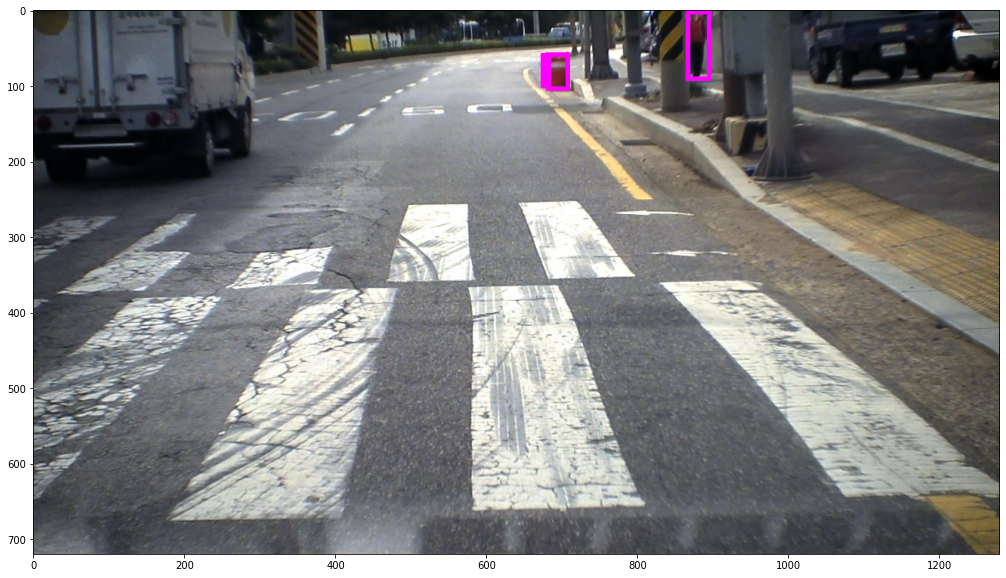

In [ ]:
# 이미지에 주석 적용
from PIL import ImageDraw

# image 객체를 만들어준다.
img_open = Image.open(f'Images/Images/{images[0]}').convert('RGBA')
with open(f'Annotations/{annots[0]}') as f:
  json_file = json.load(f)

# your code here
''' rectangle 에 명시해줄 shape 좌표
coordinates = [(x1, y1), (x2, y2)]

    (x1, y1)
        *--------------
        |             |
        |             |
        |             |
        |             |
        |             |
        |             |
        --------------*
                      (x2, y2)
'''

# 1. 0 번째 annot 파일에 몇개의 객체가 인식이 되었는지 확인
num_object = len(json_file['annotations'])
# 2. bounding boxes plotting 작업을 위한 라인
draw = ImageDraw.Draw(img_open)

# 3. 해당 이미지 내에 인식된 물체의 수만큼 반복문을 돌도록 설계
for i in range(num_object):
  image_x = json_file['annotations'][i]['bbox'][0]
  image_y = json_file['annotations'][i]['bbox'][1]
  width = json_file['annotations'][i]['bbox'][2]
  height = json_file['annotations'][i]['bbox'][3]

  shape = [(image_x, image_y), (image_x + width), (image_y + height)]
  # 최대한 정답과 비슷한 컬러와 bounding box 선의 굵기를 조절
  draw.rectangle(shape, outline ="#FF00FF", width=6)
  
# image 를 출력해주는 코드
plt.figure(figsize=(20,10))
plt.imshow(np.array(img_open))
plt.show()

# 카테고리에 따라 파일 분류

- 7 : Stones on road     정상적도로
- 8 : Pothole on road    Pothole 도로
- 9 : Filled pothole     정비된 도로
- 중복은 제외   
</br>
- 주석 파일을 카테고리에 맞는 리스트에 append()

In [ ]:
'''
{'id': 7, 'name': 'Stones on road'},
{'id': 8, 'name': 'Pothole on road'},
{'id': 9, 'name': 'Filled pothole'},
'''
stone = []
pothole = []
filled = []
'''
with open(f'Annotations/{annots[0]}') as f:
  json_file = json.load(f)
print(json_file['annotations'][0]['category_id'])
'''

for a in annots:
  # your code here
  with open(f'Annotations/{a}') as f:
    json_file = json.load(f)                  # json_file 에 딕셔너리 형태로 파일을 읽어온다.
  
  count = 0                                   # 중복 데이터를 제외시키기위한 count 를 추가
  unique_id = 0                               # ID 가 7,8,9 인 경우 id 를 담기 위해
  num_object = len(json_file['annotations'])
  for i in range(num_object):
    ID = json_file['annotations'][i]['category_id']
    if ID == 7 or ID == 8 or ID == 9:
      count += 1
      unique_id = ID
  if count == 1:                              # 데이터 중복이 없는 경우
    if unique_id == 7:
      stone.append(a)
    if unique_id == 8:
      pothole.append(a)
    if unique_id == 9:
      filled.append(a)

In [ ]:
print(len(stone), len(pothole), len(filled))

## 분류된 이미지 새 디렉토리로 복사
- shutil 라이브러리의 copy() 함수 활용
- `make_output_dir()` 함수로 디렉토리 구조를 생성
- 주석 파일과 이미지 파일을 각각 "Annotations/"와 "Images/" 디렉토리로 복사

In [ ]:
with open(f'Annotations/{annots[0]}') as f:
    json_file = json.load(f)
print(json_file)

In [ ]:
# 주어진 디렉토리 아래 "Annotations/"와 "Images/"의 두 디렉토리 생성
def make_output_dir(category):
    os.makedirs(f'{category}/Annotations')
    os.makedirs(f'{category}/Images/Images')

In [ ]:
# 카테고리별 디렉토리 생성
make_output_dir('0. stone')
make_output_dir('1. pothole')
make_output_dir('2. filled')

In [ ]:
# 위에서 생성한 디렉토리에 주석 파일과 이미지 파일 이동
import shutil
def copy_files(json_lst, category):
    for j in json_lst:
        
      # your code here


In [ ]:
# stone 에 저장된 image, annotation directory 를 0. stone 으로 옮겨라
copy_files(stone, '0. stone')
copy_files(pothole, '1. pothole')
copy_files(filled, '2. filled')

In [ ]:
num_stone = os.listdir('0. stone/Images')
num_pothole = os.listdir('1. pothole/Images')
num_filled  = os.listdir('2. filled/Images')

print(len(num_stone), len(num_pothole), len(num_filled))